In [108]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.phonon import bandstructure 
from pymatgen.phonon.plotter import PhononBSPlotter

In [109]:
with MPRester("1QkJHLuQRDewfXKS3kq") as m:

    data = m.get_phonon_bandstructure_by_material_id("mp-1367")

Voici un plot représentant toutes les branches acoustiques


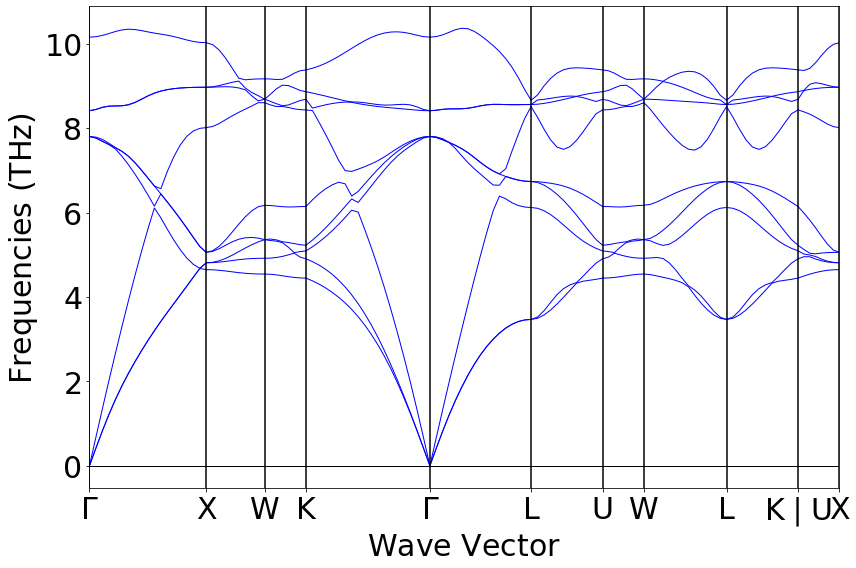

In [110]:
pstruct = PhononBSPlotter(data)
print("Voici un plot représentant toutes les branches acoustiques")
plot = pstruct.get_plot()

J'ai choisi d'étudier les trois branches colorées en rouge, vert et magenta.
Attention, La branche verte et rouge se superposent sur les chemin Gamma-X et Gamma-L
9


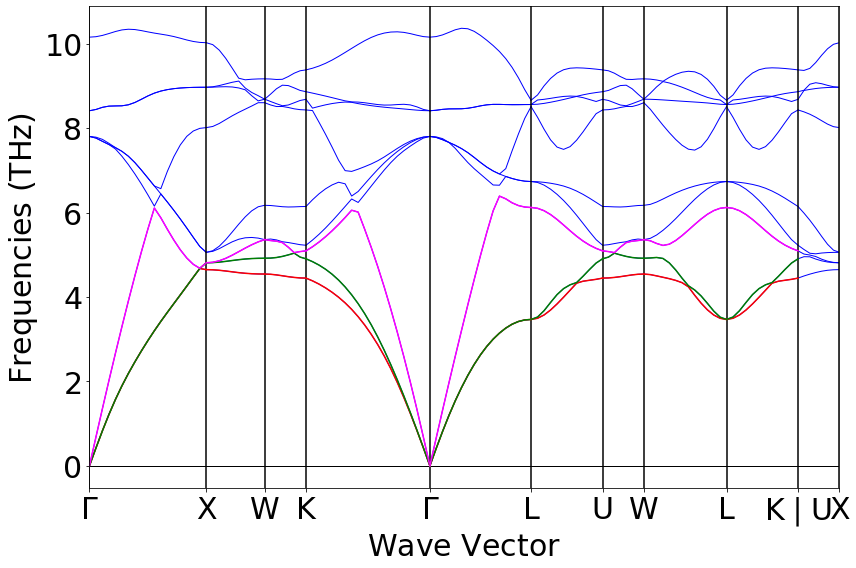

In [115]:
label = pstruct.bs_plot_data().get("ticks").get("label")# Les différents chemins
frequences = pstruct.bs_plot_data().get("frequency") # tableau contenant pour chaque chemin (première dimension du tableau), 
# pour chaque branche (deuxième dimension du tableau) toute les fréquences (troisième et dernier dimension)
distances = pstruct.bs_plot_data().get("distances") 
pstruct.get_plot()
print("J'ai choisi d'étudier les trois branches colorées en rouge, vert et magenta.")
print("Attention, les branches verte et rouge se superposent sur les chemin Gamma-X et Gamma-L")
for i in range(len(frequences[0])):
    plt.plot(distances[i], frequences[i][0], 'red')
    plt.plot(distances[i], frequences[i][1], 'green')
    plt.plot(distances[i], frequences[i][2], 'magenta')

Pour déterminer la vitesse du son dans le cristal, on doit se munir de la relation de dispersion $\omega = v|k|$ où $\omega = 2\pi f$ est la pulsation de l'onde, v la vitesse de propagation de l'onde et |k| le module du vecteur d'onde. Par facilté, on considèrera les trois premiers chemins à savoir les chemins $\Gamma - X$, $X - W$ et $W - K$.

La vitesse d'une branche sur un certain chemin correspond à la moyenne de la pente de de cette branche (qui est une courbe) sur ce chemin.    
NB: Les données dans le tableau distances sont en $\frac{1}{Å}$. Il faut faire la convertion en unité métrique. Il y a égalemement un facteur multiplicateur de 10**(12) à appliquer au données de fréquences car elles sont exprimées en teraHertz   

# $\Gamma - X$

In [112]:
ang = 10**(-10)
thz = 10**12
color = ["rouge,", "verte,", "magenta,"]
for i in range(3):
    dx = (distances[i][-1] - distances[i][0])/ang
    df = (frequences[0][i][-1] - frequences[0][i][0])*thz
    v = (2*np.pi*df)/dx
    print("Pour la branche de couleur",color[i],"la vitesse du son vaut:",np.abs(v),"m/s")

Pour la branche de couleur rouge, la vitesse du son vaut: 2940.6637695721856 m/s
Pour la branche de couleur verte, la vitesse du son vaut: 6086.466207468264 m/s
Pour la branche de couleur magenta, la vitesse du son vaut: 8607.563057527148 m/s


# $X - W$

In [113]:
for i in range(3):
    dx = (distances[i][-1] - distances[i][1])/ang
    df = (frequences[1][i][-1] - frequences[1][i][0])*thz
    v = (2*np.pi*df)/dx
    print("Pour la branche de couleur",color[i],"la vitesse du son vaut:",np.abs(v),"m/s")

Pour la branche de couleur rouge, la vitesse du son vaut: 69.98145401542051 m/s
Pour la branche de couleur verte, la vitesse du son vaut: 153.42989351660088 m/s
Pour la branche de couleur magenta, la vitesse du son vaut: 1145.7572790560412 m/s


# $W - K$

In [114]:
for i in range(3):
    dx = (distances[i][-1] - distances[i][2])/ang
    df = (frequences[2][i][-1] - frequences[2][i][0])*thz
    v = (2*np.pi*df)/dx
    print("Pour la branche de couleur",color[i],"la vitesse du son vaut:",np.abs(v),"m/s")

Pour la branche de couleur rouge, la vitesse du son vaut: 68.44737743074806 m/s
Pour la branche de couleur verte, la vitesse du son vaut: 21.72003053589879 m/s
Pour la branche de couleur magenta, la vitesse du son vaut: 667.1223782537668 m/s
